Exercise
You are given bhp.csv which contains property prices in the city of banglore, India. You need to examine price_per_sqft column and do following,

1) Remove outliers using percentile technique first. Use [0.001, 0.999] for lower and upper bound percentiles

2) After removing outliers in step 1, you get a new dataframe.

3) On step(2) dataframe, use 4 standard deviation to remove outliers

4) Plot histogram for new dataframe that is generated after step (3). Also plot bell curve on same histogram

5) On step(2) dataframe, use zscore of 4 to remove outliers. This is quite similar to step (3) and you will get exact same result

In [2]:
import pandas as pd

df = pd.read_csv('bhp.csv')
df.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


In [7]:
max_percentile = df['price_per_sqft'].quantile(0.999)
min_percentile = df['price_per_sqft'].quantile(0.001)

print(f"Max Percentile : {max_percentile}")
print(f"Min Percentile : {min_percentile}")

Max Percentile : 50959.36200000098
Min Percentile : 1366.184


In [9]:
outlier = df[(df['price_per_sqft']>max_percentile) | (df['price_per_sqft']<min_percentile)]
outlier.shape

(28, 7)

In [11]:
df1 = df[(df['price_per_sqft']<max_percentile) & (df['price_per_sqft']>min_percentile)]
df1.shape

(13172, 7)

In [12]:
# Remove Total Outliers, 

outliers = df.shape[0] - df1.shape[0]
outliers

28

4 standard deviation to remove outliers, 

In [14]:
max_limit = (df1['price_per_sqft'].mean()) + 4*df1['price_per_sqft'].std()
min_limit = (df1['price_per_sqft'].mean()) - 4*df1['price_per_sqft'].std()

In [16]:
outliers2 = df1[(df1['price_per_sqft']>max_limit) | (df1['price_per_sqft']<min_limit)]
outliers2.shape

(125, 7)

In [17]:
df2 = df1[(df1['price_per_sqft']<max_limit) & (df1['price_per_sqft']>min_limit)]
df2.shape

(13047, 7)

In [18]:
df1.shape[0] - df2.shape[0]

125

Text(0, 0.5, 'Count')

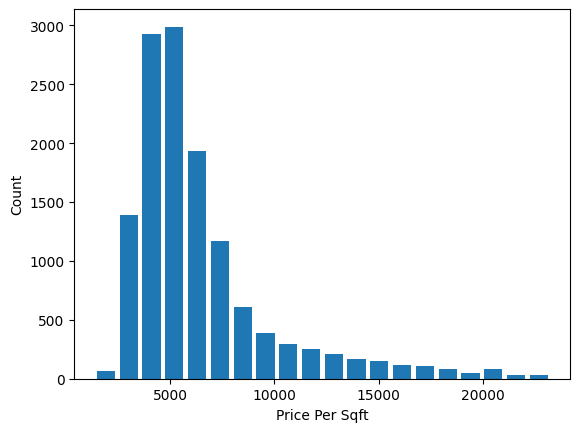

In [24]:
import matplotlib.pyplot as plt

plt.hist(df2['price_per_sqft'],bins=20,rwidth=0.8)
plt.xlabel("Price Per Sqft")
plt.ylabel("Count")


On step(2) dataframe, use zscore of 4 to remove outliers. This is quite similar to step (3) and you will get exact same result

In [27]:
df3 = df2.copy()
df3['z_score'] = (df3['price_per_sqft'] - df3['price_per_sqft'].mean())/ df3['price_per_sqft'].std()
df3

,location,size,total_sqft,bath,price,bhk,price_per_sqft,z_score
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699,-0.788586
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615,-0.525947
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305,-0.614831
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245,-0.058586
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250,-0.630601
...,...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689,0.068720
13196,other,4 BHK,3600.0,5.0,400.00,4,11111,1.336615
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258,-0.341583
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407,1.134761


In [34]:
max_limit1 = (df3['price_per_sqft'].mean()) + 4* df3['price_per_sqft'].std()
min_limit1 = (df3['price_per_sqft'].mean()) + 4* df3['price_per_sqft'].std()

# no need to find out bcz in the df3 dataset still exist zscore column, 

In [35]:
outliers3 = df3[(df3['z_score']>4) | (df3['z_score']< -4)]
outliers3.shape

(86, 8)

In [36]:
df4  = df3[(df3['z_score']<4) & (df3['z_score']>-4)]
df4.shape

(12961, 8)

In [37]:
df3.shape[0] - df4.shape[0]

86